# Homework 1

In this homework, we will go through the basic data processing and analysis tasks based on a TCGA dataset. 

Source study: https://www.cbioportal.org/study/summary?id=msk_impact_2017


In [1]:
import pandas as pd
import numpy as np
import os

# Q1. Data loading and processing

We have three tables prepared, named
- `./data/gene_expression_rna.xena`: the gene expression dataset
- `./data/gene_mutation_dna.xena`: the gene mutation dataset
- `./data/diagnosis_outcome.xena`: the patient clinical data dataset

## Q1.1. Reindex and transpose the dataframe

Given a gene expression dataset where:

The columns represent sample indices (patients).
The first column contains the names of RNA sequences.
To proceed with further analysis, we need to transpose the DataFrame so that:

There is a column named "sample" containing all the sample IDs.
The other columns represent the RNA names.
Each row corresponds to the expression values for each RNA.
Write the code to perform this transformation.

In [2]:
# load gene expression data
data_dir = "./data"
df_exp = pd.read_csv(os.path.join(data_dir, "gene_expression_rna.xena"), sep="\t")
df_exp

,sample,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
0,100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100133144,2.09,1.88,1.45,0.00,0.00,1.12,1.29,0.00,2.45,...,2.42,2.74,2.64,3.99,4.40,3.00,4.27,3.71,4.29,4.24
2,100134869,2.30,3.32,2.92,1.35,2.45,2.82,1.72,1.24,2.60,...,1.87,2.12,1.78,2.60,3.66,3.87,3.07,3.65,3.64,3.99
3,10357,7.23,6.36,6.45,5.78,6.09,6.71,6.58,6.31,6.13,...,9.31,8.20,9.43,9.14,10.02,9.32,9.54,8.99,9.48,9.46
4,10431,10.99,10.35,10.04,11.20,10.30,10.87,9.96,10.78,10.25,...,10.23,9.33,10.21,9.38,9.34,10.34,10.17,10.43,9.93,10.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,0.57,5.02,0.67,3.66,3.14,6.43,0.50,1.76,1.04,...,4.45,1.51,1.97,7.91,1.51,2.09,4.18,2.25,0.38,7.77
20527,ZYG11B,9.34,10.19,9.66,9.12,9.64,9.03,9.12,9.84,9.66,...,10.37,10.00,9.67,9.83,9.90,9.82,9.57,9.86,9.73,9.75
20528,ZYX,10.85,11.58,11.38,11.21,9.47,9.74,13.42,11.05,10.92,...,11.44,12.28,11.75,9.94,11.45,11.71,12.06,11.60,11.69,11.29
20529,ZZEF1,10.18,10.89,10.53,10.16,9.64,9.81,10.10,9.97,9.82,...,10.33,11.01,11.24,10.35,10.13,10.77,11.40,10.42,10.90,10.29


In [3]:
# ##############
# your code starts here
# Answer

# ##############

In [7]:
###### testing script ######
assert len(df_exp) == 11069
assert len(df_exp.columns) == 20532
assert df_exp["sample"][0] == "TCGA-OR-A5J1-01"
############################

In [8]:
# load mutation data
df_mutation = pd.read_csv(os.path.join(data_dir, "gene_mutation_dna.xena"), sep="\t")
df_mutation

In [9]:
# ##############
# your code starts here
# Answer

# ##############

sample,sample,UBE2Q2,CHMP1B,PSMA2P1,SHQ1P1,CPHL1P,SSXP10,REM1,TCOF1,NSRP1,...,TULP2,OR1E5,RP11-390F4.3,GNGT2,GNGT1,PTRF,DIAPH2-AS1,SELV,NFIX,SELP
0,TCGA-02-0003-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-02-0033-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-02-0047-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-02-0055-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-02-2470-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,TCGA-ZS-A9CF-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9100,TCGA-ZS-A9CG-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9101,TCGA-ZT-A8OM-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9102,TCGA-ZU-A8S4-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
###### testing script ######
assert len(df_mutation) == 9104
assert len(df_mutation.columns) == 40544
assert df_mutation["sample"][0] == "TCGA-02-0003-01"
############################

In [12]:
# load patient disease diagnosis data
df_diag = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome.xena"), sep="\t")
df_diag

,sample,_PATIENT,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-OR-A5J1-01,TCGA-OR-A5J1,ACC,58.0,MALE,WHITE,Stage II,NaN,Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0,NaN
1,TCGA-OR-A5J2-01,TCGA-OR-A5J2,ACC,44.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,1677.0,1.0,1677.0,NaN,NaN,1.0,289.0,NaN
2,TCGA-OR-A5J3-01,TCGA-OR-A5J3,ACC,23.0,FEMALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,...,NaN,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0,NaN
3,TCGA-OR-A5J4-01,TCGA-OR-A5J4,ACC,23.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,423.0,1.0,423.0,NaN,NaN,1.0,126.0,NaN
4,TCGA-OR-A5J5-01,TCGA-OR-A5J5,ACC,30.0,MALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,365.0,1.0,365.0,NaN,NaN,1.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12586,TCGA-YZ-A980-01,TCGA-YZ-A980,UVM,75.0,MALE,WHITE,Stage IIIA,Stage IIIA,Spindle Cell|Epithelioid Cell,NaN,...,NaN,0.0,1862.0,0.0,1862.0,NaN,NaN,1.0,1556.0,NaN
12587,TCGA-YZ-A982-01,TCGA-YZ-A982,UVM,79.0,FEMALE,WHITE,Stage IIIB,Stage IIIB,Spindle Cell,NaN,...,NaN,0.0,495.0,0.0,495.0,NaN,NaN,0.0,495.0,NaN
12588,TCGA-YZ-A983-01,TCGA-YZ-A983,UVM,51.0,FEMALE,WHITE,Stage IIB,Stage IIB,Epithelioid Cell,NaN,...,NaN,0.0,798.0,0.0,798.0,NaN,NaN,0.0,798.0,NaN
12589,TCGA-YZ-A984-01,TCGA-YZ-A984,UVM,50.0,FEMALE,WHITE,Stage IIB,Stage IIIA,Spindle Cell|Epithelioid Cell,NaN,...,NaN,1.0,1396.0,1.0,1396.0,NaN,NaN,1.0,154.0,NaN


In [22]:
df_mutation

sample,sample,UBE2Q2,CHMP1B,PSMA2P1,SHQ1P1,CPHL1P,SSXP10,REM1,TCOF1,NSRP1,...,TULP2,OR1E5,RP11-390F4.3,GNGT2,GNGT1,PTRF,DIAPH2-AS1,SELV,NFIX,SELP
0,TCGA-02-0003-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-02-0033-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-02-0047-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-02-0055-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-02-2470-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,TCGA-ZS-A9CF-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9100,TCGA-ZS-A9CG-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9101,TCGA-ZT-A8OM-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9102,TCGA-ZU-A8S4-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Q2. EDA


## Q2.1. Data distribution

Given clinical outcome data `df_diag`, determine the distribution of different cancer types. The output should be a DataFrame with the following three columns:

- `Term`: The name of the cancer type.
- `# of Count`: The count of occurrences for each cancer type.
- `Frequency (%)`: The percentage representation of each cancer type within the dataset.

The first row to the last should be the most frequent terms to the least.

Write the code to compute this distribution and create the DataFrame, name it as `output_df`.

In [28]:
df_diag["cancer type abbreviation"]
# output_df = ...

# ##############
# your code starts here
# Answer

# ##############

In [42]:
###### testing script ######
assert len(output_df) == 33
assert output_df.columns.tolist() == ["Term", "# of Counts", "Frequency (%)"]
assert output_df.iloc[4]["Term"] == "OV"
assert output_df.iloc[5]["# of Counts"] == 604
assert round(output_df.iloc[6]["Frequency (%)"],2) == 4.78
############################

## Q2.2 Number of Samples per Patient

Given a dataset containing clinical data with the columns "_PATIENT" and "sample", determine the ratio of the number of samples per patient. 

The summary DataFrame named `output_df` should have
- `Term`: patient with one/two/three/... samples
- `# of Counts`: number of patients in each group
- `Frequency (%)`: the frequency of patients in each group

In [44]:
df_diag[["_PATIENT", "sample"]]
# output_df = ...


# ##############
# your code starts here
# Answer

# ##############

/tmp/ipykernel_965/4240432068.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df_diag[["_PATIENT", "sample"]].groupby("_PATIENT").apply(len).reset_index()


,Term,# of Counts,Frequency (%)
0,1,9577,86.427218
1,2,1498,13.518636
2,3,6,0.054147


In [45]:
###### testing script ######
assert len(output_df) == 3
assert output_df.columns.tolist() == ["Term", "# of Counts", "Frequency (%)"]
assert output_df.iloc[1]["# of Counts"] == 1498
assert round(output_df.iloc[2]["Frequency (%)"],2) == 0.05
############################

## Q2.3. Prevalence of TP53 Gene Mutation Across Cancer Subtypes

Using the mutation data from `df_mutation` and cancer subtype data from `df_diag`, determine the prevalence of the TP53 gene mutation across different cancer subtypes. 

Output the results as a `pd.Series` named `output_df`, ordered by the count of mutations from largest to smallest.

In [50]:
df_diag
df_mutation
# output_df = ...

# ##############
# your code starts here
# Answer

# ##############

In [53]:
###### testing script ######
assert len(output_df) == 31
assert output_df.iloc[1] == 357
############################

# Q3. More EDA

## Q3.1. TP53 Gene Expression Across Cancer Subtypes

Using the gene expression data `df_exp` and cancer subtype data `df_diag`, visualize where the TP53 gene is expressed across different cancer subtypes. The goal is to create a ridge plot that shows the distribution of TP53 expression values for each cancer subtype.

Requirements:
1. Merge the TP53 expression data with the cancer subtype data.
2. Calculate the average TP53 expression value for each cancer subtype.
3. Sort the cancer subtypes based on the average TP53 expression value.
4. Create a list of arrays named `output_ar`, where each array contains the TP53 expression values for one cancer subtype, ordered by the sorted subtypes.
5. Generate a ridge plot using the `output_ar` list.
6. Save the plot as an HTML file named `fig.html`.

Write the code to perform these tasks and generate the ridge plot.

In [60]:
!pip install ridgeplot
import ridgeplot as rd

# ##############
# your code starts here
# Answer

# ##############

In [72]:
###### testing script ######
import numpy as np
assert len(output_ar) == 33
assert abs(np.mean(output_ar[0]) - 11.28954954954955) <= 1e-8
############################

## Q3.2 Survival curve
Using the clinical outcome data `df_diag`, perform a Kaplan-Meier survival analysis to estimate the survival function. 

Output Requirements:
- `mean_survival_time`: The median survival times estimated from the Kaplan-Meier model.
- `kmf_exp`: The fitted Kaplan-Meier model.
- A plot of the survival function.

Write the code to generate these outputs.

<Axes: xlabel='timeline'>

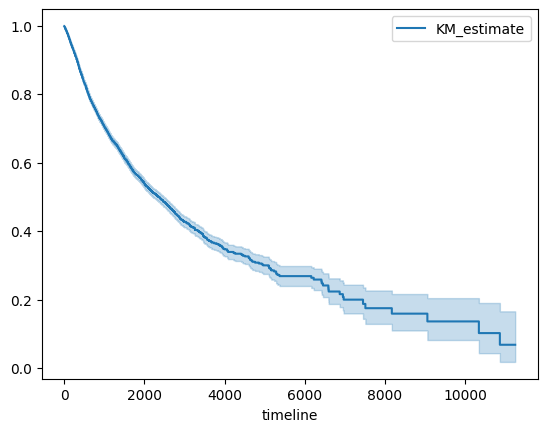

In [89]:
df_diag
# kmf_exp = ...
# mean_survival_time = ...

# ##############
# your code starts here
# Answer

# ##############

In [106]:
###### testing script ######
assert mean_survival_time == 2352
assert kmf_exp.percentile(0.1) == 10870
assert abs(kmf_exp.cumulative_density_.iloc[-1].values[0] - 0.9318587450619613) < 1e-6
############################

/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning:

Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.




## Q3.3 Differences in Overall Survival Based on TTN Expression Levels

Using the gene expression data `df_exp` and clinical outcome data `df_diag`, analyze the differences in overall survival between patients with higher TTN expression and those with lower TTN expression, specifically for the cancer subtype "LAML".

Definition:
- **High TTN expression**: Patients whose TTN expression level is above the median.
- **Low TTN expression**: Patients whose TTN expression level is at or below the median.

Output Requirements:
1. Two fitted Kaplan-Meier survival models:
   - One for patients with high TTN expression, named `kmf_exp`.
   - One for patients with low TTN expression, named `kmf_control`.
2. Median survival times for both groups, named `median_survival_time_exp` and `median_survival_time_control`.
3. A plot comparing the survival functions of both groups, including at-risk counts.

Write the code to generate these outputs.

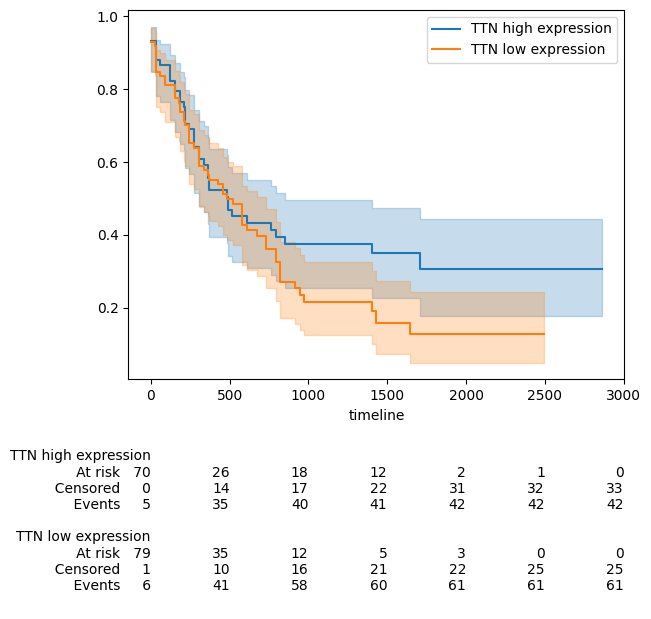

In [110]:
# kmf_exp = ...
# kmf_control = ...
# median_survival_time_exp = ...
# median_survival_time_control = ...

# ##############
# your code starts here
# Answer

# ##############

In [ ]:
###### testing script ######
assert median_survival_time_exp == 489
assert median_survival_time_control == 486
assert kmf_exp.percentile(0.8) == 153
assert kmf_control.percentile(0.8) == 150
############################

## Q3.4 Heatmap of gene mutation and cancer subtypes
Using the mutation data `df_mutation` and clinical outcome data `df_diag`, visualize how many mutations of each gene occur in each cancer subtype. Focus on the top 10 cancer subtypes and the top 10 most prevalent gene mutations.

Output Requirements:
1. A DataFrame named `mutation_counts` with the following structure:
   - Rows: Top 10 cancer subtypes.
   - Columns: Top 10 most prevalent gene mutations.
   - Each cell contains the count of mutations for a specific gene in a specific cancer subtype.
   
   Example structure of `mutation_counts`:
   
| cancer type abbreviation   |   TP53 |   TTN |   MUC16 |   CSMD3 |   PIK3CA |   LRP1B |   RYR2 |   SYNE1 |   FLG |   PCLO |
|:---------------------------|-------:|------:|--------:|--------:|---------:|--------:|-------:|--------:|------:|-------:|
| ACC                        |     17 |    13 |      14 |       4 |        1 |       3 |      5 |       4 |     5 |      1 |
| BLCA                       |    199 |   191 |     115 |      56 |       89 |      48 |     74 |      83 |    67 |     41 |
| BRCA                       |    264 |   137 |      78 |      35 |      273 |      28 |     47 |      50 |    43 |     27 |
| CESC                       |     23 |    93 |      50 |      20 |       84 |      33 |     34 |      36 |    37 |     24 |

2. A heatmap visualizing the mutation counts across the top 10 cancer subtypes and the top 10 most prevalent genes.

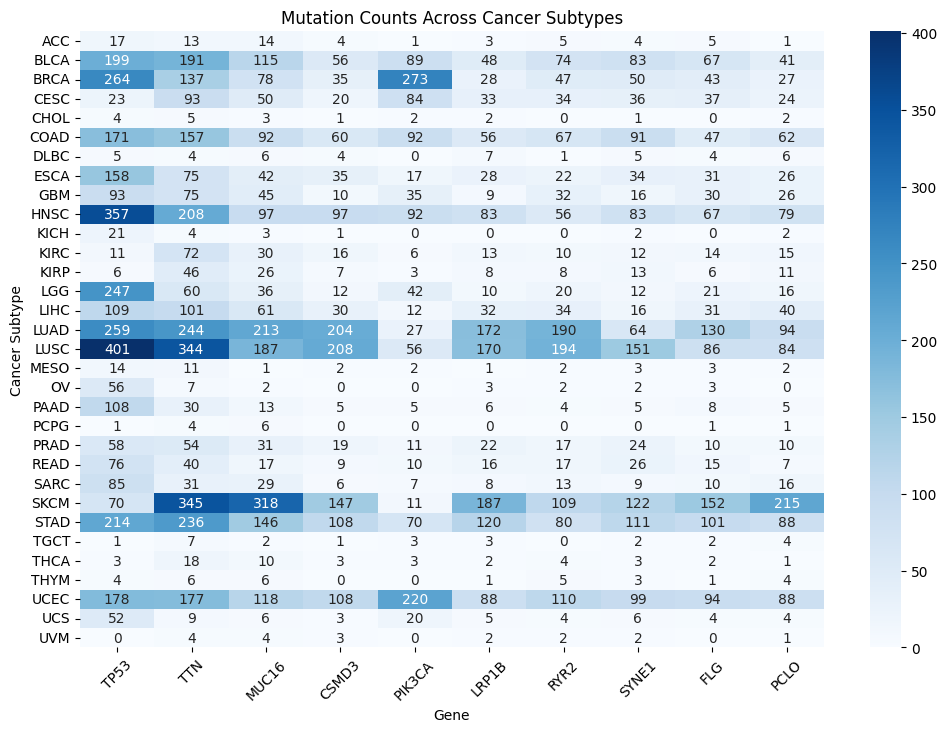

In [120]:
# mutation_counts = ...

# ##############
# your code starts here
# Answer

# ##############

In [157]:
###### testing script ######
assert len(mutation_counts) == 32
assert len(mutation_counts.columns) == 11
assert mutation_counts[mutation_counts["cancer type abbreviation"] == "ACC"][['TP53','TTN','MUC16','CSMD3', 'PIK3CA','LRP1B','RYR2','SYNE1','FLG','PCLO']].iloc[0].tolist() == [17, 13, 14, 4, 1, 3, 5, 4, 5, 1]
############################